In [4]:
# Importing numpy with the alias 'np'
import numpy as np  

# Importing pandas as 'pd', is a library for data manipulation and analysis.
import pandas as pd  

# Importing 'pyplot' from 'matplotlib' with an alias 'plt', used for creating static or animated interactive plots.
import matplotlib.pyplot as plt  

# Importing 'rcParams' from 'matplotlib' to customize plot settings.
from matplotlib import rcParams  

# Importing the sklearn package for machine learning algorithms and tools.
import sklearn  

# Importing 'KMeans' from sklearn's cluster module for performing K-Means clustering.
from sklearn.cluster import KMeans  

# Importing 'Axes3D' from 'mpl_toolkits.mplot3d' to enable 3D plotting.
from mpl_toolkits.mplot3d import Axes3D  

# Importing 'scale' from sklearn's preprocessing module for feature scaling.
from sklearn.preprocessing import scale  

# Importing 'metrics' from sklearn as 'am' for calculating performance metrics.
import sklearn.metrics as am  

# Importing datasets from sklearn, which provides standard datasets to practice machine learning techniques.
from sklearn import datasets  

# Importing specific metrics functions: 'confusion_matrix' and 'classification_report' for evaluating classification models.
from sklearn.metrics import confusion_matrix, classification_report  

# Importing seaborn as 'sns', a data visualization library based on matplotlib with a high-level interface.
import seaborn as sns  

In [5]:
# Graph setup 

%matplotlib inline 

rcParams['figure.figsize'] = 7,4 

In [6]:
# Loads the Iris dataset from the sklearn datasets module.
iris = datasets.load_iris()

# Scals the features in the Iris dataset to have a mean of 0 and a standard deviation of 1.
X = scale(iris.data)

# Converts the target labels of the Iris dataset into a pandas DataFrame.
y = pd.DataFrame(iris.target)

# Stores the names of the features (e.g., sepal length, sepal width) in a variable.
variable_names = iris.feature_namesX[0:10,] 

AttributeError: feature_namesX

In [11]:
# Cluster the data 

clustering = KMeans(n_clusters=3, random_state=5, n_init=10) # sets the number of centroids and randomizes centroid positions 

clustering.fit(X) 

KMeans(n_clusters=3, n_init=10, random_state=5)

In [12]:
# Convertes the Iris dataset features into a pandas DataFrame.
iris_df = pd.DataFrame(iris.data)

# Renames the columns of the DataFrame to more descriptive names.
iris_df.columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]

# Renames the column of the target DataFrame to "Targets".
y.columns = ["Targets"]

Text(0.5, 1.0, 'K-Means Classification')

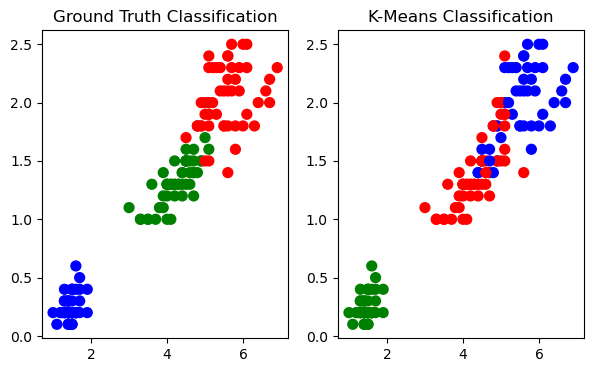

In [13]:
# Reassigns the cluster labels so its easier to read
# The np.choose function reorders the clustering labels and maps them to 2, 0, and 1.
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

# Sets up the plotting environment for two subplots.
plt.subplot(1, 2, 1)

# Defines a color theme array to map numerical labels to specific colors.
color_theme = np.array(['blue', 'green', 'red'])

# Creats a scatter plot for the ground truth classification.
# Petal_Length is plotted on the x-axis, Petal_Width on the y-axis, 
# points are colored based on the true iris species.
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

# Creates a second subplot for the K-Means clustering results.
plt.subplot(1, 2, 2)

# Creates a scatter plot for the K-Means classification.
# Points are colored based on the clustering labels from the K-Means model.
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title("K-Means Classification")

In [14]:
print(classification_report(y, relabel))  #prints results of the test through a table or results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

